In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sqlite

In [2]:
# reading in excel table 1(immigrant stock) while moving the the header 15 rows up and skipping rows 16-39

immigrantstock=pd.read_excel('../data/UN_MigrantStockTotal_2019.xlsx',
             sheet_name= 'Table 1',
              header=15, skiprows=[i for i in range (16,39)])

In [3]:
immigrantstock

Unnamed: 0                 Unnamed: 1  Unnamed: 2  Unnamed: 3 Unnamed: 4  \
0            24                    Burundi         NaN         108        B R   
1            25                    Comoros         NaN         174          B   
2            26                   Djibouti         NaN         262        B R   
3            27                    Eritrea         NaN         232          I   
4            28                   Ethiopia         NaN         231        B R   
..          ...                        ...         ...         ...        ...   
255         279                    Bermuda         NaN          60          B   
256         280                     Canada         NaN         124          B   
257         281                  Greenland         NaN         304          B   
258         282  Saint Pierre and Miquelon         NaN         666          B   
259         283   United States of America         NaN         840          B   

         1990      1995      2000      2005      2010  ...      2010.1  \
0      333110    254853    125628    172874    235259  ...    115823.0   
1       14079     13939     13799     13209     12618  ...      6060.0   
2      122221     99774    100507     92091    101575  ...     53295.0   
3       11848     12400     12952     14314     15676  ...      8603.0   
4     1155390    806904    611384    514242    568748  ...    298069.0   
..        ...       ...       ...       ...       ...  ...         ...   
255     15683     16676     17668     18276     18884  ...      9202.0   
256   4333318   4864778   5511914   6078985   6761226  ...   3236539.0   
257      9282      7121      6601      6556      6091  ...      4119.0   
258      1099      1320      1458      1147      1017  ...       531.0   
259  23251026  28451053  34814053  39258293  44183643  ...  21694169.0   

       2015.1      2019.1    1990.2    1995.2    2000.2    2005.2    2010.2  \
0      142790    158163.0    169843    130688     64534     88069    119436   
1        6071      6047.0      7362      7325      7288      6923      6558   
2       59081     60654.0     57979     47298     47587     40776     48280   
3        8833      8922.0      5620      5858      6096      6585      7073   
4      591409    637963.0    548106    382787    289165    244517    270679   
..        ...         ...       ...       ...       ...       ...       ...   
255      9336      9439.0      8126      8632      9137      9410      9682   
256   3533164   3786190.0   2223666   2508673   2852779   3163147   3524687   
257      3812      3742.0      2810      2246      1985      2095      1972   
258       516       519.0       539       638       702       550       486   
259  23446873  24488382.0  11878041  14418894  17503268  19643415  22489474   

         2015.2    2019.2  
0      147020.0    162855  
1        6484.0      6457  
2       53270.0     54687  
3        7108.0      7179  
4      570233.0    615120  
..          ...       ...  
255      9790.0      9897  
256   3895493.0   4174467  
257      1985.0      1948  
258       470.0       471  
259  24732004.0  26172767  

[260 rows x 26 columns]

In [4]:
# dropping the columns highlighted in blue in the excel sprdsheet(ones i dont want)
immigrantstock=immigrantstock.loc[~(immigrantstock['Unnamed: 0']==44)& ~(immigrantstock['Unnamed: 0']==54) & ~(immigrantstock['Unnamed: 0']==60)
                   & ~(immigrantstock['Unnamed: 0']==78) & ~(immigrantstock['Unnamed: 0']==79) & ~(immigrantstock['Unnamed: 0']==87)
                   & ~(immigrantstock['Unnamed: 0']==106) & ~(immigrantstock['Unnamed: 0']==107) & ~(immigrantstock['Unnamed: 0']==113)
                   & ~(immigrantstock['Unnamed: 0']==123) & ~(immigrantstock['Unnamed: 0']==124) & ~(immigrantstock['Unnamed: 0']==132)
                   & ~(immigrantstock['Unnamed: 0']==144) & ~(immigrantstock['Unnamed: 0']==145) & ~(immigrantstock['Unnamed: 0']==172)
                   & ~(immigrantstock['Unnamed: 0']==181) & ~(immigrantstock['Unnamed: 0']==196) & ~(immigrantstock['Unnamed: 0']==197)
                   & ~(immigrantstock['Unnamed: 0']==200) & ~(immigrantstock['Unnamed: 0']==206) & ~(immigrantstock['Unnamed: 0']==214)
                   & ~(immigrantstock['Unnamed: 0']==224) & ~(immigrantstock['Unnamed: 0']==225) & ~(immigrantstock['Unnamed: 0']==226)
                   & ~(immigrantstock['Unnamed: 0']==237) & ~(immigrantstock['Unnamed: 0']==251) & ~(immigrantstock['Unnamed: 0']==268)
                   & ~(immigrantstock['Unnamed: 0']==278)]

In [5]:
# renaming the columns but toward 2010 i had to put the column in '' because its not a str. so you'll see the first few
#columns in green and then it'll be all in ''.

img_stk_gndr=immigrantstock.rename(columns = {'Unnamed: 0':'Sort order','Unnamed: 1' : 'Major country, area of destination',
                                          'Unnamed: 2' : 'Notes','Unnamed: 3' : 'Code','Unnamed: 4' : 'Type of data',
                                          1990 : 'M/F 1990',1995 : 'M/F 1995',2000 : 'M/F 2000',
                                         2005:'M/F 2005',2010 : 'M/F 2010',2015 : 'M/F img_stk 2015',2019: 'M/F img_stk 2019',
                                          1990.1 : 'M 1990',1995.1 : 'M 1995',2000.1 : 'M 2000',
                                         2005.1:'M 2005','2010.1' : 'M 2010','2015.1' : 'M img_stk 2015','2019.1': 'M img_stk 2019',
                                         '1990.2' : 'F 1990','1995.2' : 'F 1995','2000.2' : 'F 2000',
                                         '2005.2':'F 2005','2010.2' : 'F 2010','2015.2' : 'F img_stk 2015','2019.2': 'F img_stk 2019'})

In [6]:
img_stk_gndr

Sort order Major country, area of destination  Notes  Code Type of data  \
0            24                            Burundi    NaN   108          B R   
1            25                            Comoros    NaN   174            B   
2            26                           Djibouti    NaN   262          B R   
3            27                            Eritrea    NaN   232            I   
4            28                           Ethiopia    NaN   231          B R   
..          ...                                ...    ...   ...          ...   
255         279                            Bermuda    NaN    60            B   
256         280                             Canada    NaN   124            B   
257         281                          Greenland    NaN   304            B   
258         282          Saint Pierre and Miquelon    NaN   666            B   
259         283           United States of America    NaN   840            B   

     M/F 1990  M/F 1995  M/F 2000  M/F 2005  M/F 2010  ...      M 2010  \
0      333110    254853    125628    172874    235259  ...    115823.0   
1       14079     13939     13799     13209     12618  ...      6060.0   
2      122221     99774    100507     92091    101575  ...     53295.0   
3       11848     12400     12952     14314     15676  ...      8603.0   
4     1155390    806904    611384    514242    568748  ...    298069.0   
..        ...       ...       ...       ...       ...  ...         ...   
255     15683     16676     17668     18276     18884  ...      9202.0   
256   4333318   4864778   5511914   6078985   6761226  ...   3236539.0   
257      9282      7121      6601      6556      6091  ...      4119.0   
258      1099      1320      1458      1147      1017  ...       531.0   
259  23251026  28451053  34814053  39258293  44183643  ...  21694169.0   

     M img_stk 2015 M img_stk 2019    F 1990    F 1995    F 2000    F 2005  \
0            142790       158163.0    169843    130688     64534     88069   
1              6071         6047.0      7362      7325      7288      6923   
2             59081        60654.0     57979     47298     47587     40776   
3              8833         8922.0      5620      5858      6096      6585   
4            591409       637963.0    548106    382787    289165    244517   
..              ...            ...       ...       ...       ...       ...   
255            9336         9439.0      8126      8632      9137      9410   
256         3533164      3786190.0   2223666   2508673   2852779   3163147   
257            3812         3742.0      2810      2246      1985      2095   
258             516          519.0       539       638       702       550   
259        23446873     24488382.0  11878041  14418894  17503268  19643415   

       F 2010  F img_stk 2015 F img_stk 2019  
0      119436        147020.0         162855  
1        6558          6484.0           6457  
2       48280         53270.0          54687  
3        7073          7108.0           7179  
4      270679        570233.0         615120  
..        ...             ...            ...  
255      9682          9790.0           9897  
256   3524687       3895493.0        4174467  
257      1972          1985.0           1948  
258       486           470.0            471  
259  22489474      24732004.0       26172767  

[232 rows x 26 columns]

In [7]:
#keeping what I need from the above table to an new table named img_stk_2yrs (only keeping 2yrs of data)

img_stk_2yrs=img_stk_gndr[['Sort order','Major country, area of destination','M/F img_stk 2015', 'M/F img_stk 2019',
                           'M img_stk 2015', 'M img_stk 2019','F img_stk 2015', 'F img_stk 2019' ]]

In [8]:
img_stk_2yrs

Sort order Major country, area of destination  M/F img_stk 2015  \
0            24                            Burundi          289810.0   
1            25                            Comoros           12555.0   
2            26                           Djibouti          112351.0   
3            27                            Eritrea           15941.0   
4            28                           Ethiopia         1161642.0   
..          ...                                ...               ...   
255         279                            Bermuda           19126.0   
256         280                             Canada         7428657.0   
257         281                          Greenland            5797.0   
258         282          Saint Pierre and Miquelon             986.0   
259         283           United States of America        48178877.0   

     M/F img_stk 2019  M img_stk 2015  M img_stk 2019  F img_stk 2015  \
0            321018.0          142790        158163.0        147020.0   
1             12504.0            6071          6047.0          6484.0   
2            115341.0           59081         60654.0         53270.0   
3             16101.0            8833          8922.0          7108.0   
4           1253083.0          591409        637963.0        570233.0   
..                ...             ...             ...             ...   
255           19336.0            9336          9439.0          9790.0   
256         7960657.0         3533164       3786190.0       3895493.0   
257            5690.0            3812          3742.0          1985.0   
258             990.0             516           519.0           470.0   
259        50661149.0        23446873      24488382.0      24732004.0   

     F img_stk 2019  
0            162855  
1              6457  
2             54687  
3              7179  
4            615120  
..              ...  
255            9897  
256         4174467  
257            1948  
258             471  
259        26172767  

[232 rows x 8 columns]

In [9]:
# reading in excel Table 2 (country population table)while moving the the header 15 rows up and skipping rows 16-39
country_pop=pd.read_excel('../data/UN_MigrantStockTotal_2019.xlsx',
             sheet_name= 'Table 2',
              header=15, skiprows=[i for i in range (16,39)])

In [10]:
country_pop

Unnamed: 0                 Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0            24                    Burundi         NaN         108   
1            25                    Comoros         NaN         174   
2            26                   Djibouti         NaN         262   
3            27                    Eritrea         NaN         232   
4            28                   Ethiopia         NaN         231   
..          ...                        ...         ...         ...   
255         279                    Bermuda         NaN          60   
256         280                     Canada         NaN         124   
257         281                  Greenland         NaN         304   
258         282  Saint Pierre and Miquelon         NaN         666   
259         283   United States of America         NaN         840   

           1990        1995        2000        2005        2010        2015  \
0      5438.957    5987.043    6378.871    7364.862    8675.602   10160.030   
1       411.594     475.394     542.357     611.627     689.692     777.424   
2       590.398     630.388     717.584     783.254     840.198     913.993   
3      2258.653    2204.222    2292.416    2826.659    3170.435    3342.818   
4     47887.865   57047.908   66224.804   76346.311   87639.964  100835.458   
..          ...         ...         ...         ...         ...         ...   
255      61.634      63.442      65.012      66.257      65.389      63.692   
256   27541.319   29164.152   30588.383   32164.309   34147.564   36026.676   
257      55.604      55.811      56.175      56.951      56.638      56.377   
258       6.393       6.392       6.294       6.123       6.353       5.993   
259  252120.309  265163.745  281710.909  294993.511  309011.475  320878.310   

     ...     2010.1      2015.1      2019.1      1990.2      1995.2  \
0    ...   4287.851    5030.735    5718.988    2774.306    3061.896   
1    ...    347.627     392.089      429.21     205.212     236.593   
2    ...    447.092     483.117     511.947     293.434     313.216   
3    ...   1584.072     1674.33    1752.711    1129.111    1107.243   
4    ...  43727.479   50408.589   56069.008   24007.485   28607.127   
..   ...        ...         ...         ...         ...         ...   
255  ...         ..          ..          ..          ..          ..   
256  ...  16941.808   17864.138   18563.538   13884.674   14726.014   
257  ...         ..          ..          ..          ..          ..   
258  ...         ..          ..          ..          ..          ..   
259  ...  152610.91  158712.121  162826.299  128570.956  134885.042   

         2000.2      2005.2      2010.2      2015.2      2019.2  
0      3246.943     3735.55    4387.755    5129.299    5811.589  
1       269.505     303.613     342.069     385.346     421.681  
2       356.818     389.622     393.102     430.881      461.61  
3      1151.345    1416.324    1586.365    1668.488    1744.406  
4     33205.382   38272.232   43912.483   50426.864   56009.719  
..          ...         ...         ...         ...         ...  
255          ..          ..          ..          ..          ..  
256   15436.061   16218.869   17205.758    18162.53     18847.5  
257          ..          ..          ..          ..          ..  
258          ..          ..          ..          ..          ..  
259  142949.326  149425.428  156400.559  162166.191  166238.618  

[260 rows x 25 columns]

In [11]:
# dropping the rows highlighted in blue in the excel sprdsheet(ones i dont want)

country_pop=country_pop.loc[~(country_pop['Unnamed: 0']==44)& ~(country_pop['Unnamed: 0']==54) & ~(country_pop['Unnamed: 0']==60)
                   & ~(country_pop['Unnamed: 0']==78) & ~(country_pop['Unnamed: 0']==79) & ~(country_pop['Unnamed: 0']==87)
                   & ~(country_pop['Unnamed: 0']==106) & ~(country_pop['Unnamed: 0']==107) & ~(country_pop['Unnamed: 0']==113)
                   & ~(country_pop['Unnamed: 0']==123) & ~(country_pop['Unnamed: 0']==124) & ~(country_pop['Unnamed: 0']==132)
                   & ~(country_pop['Unnamed: 0']==144) & ~(country_pop['Unnamed: 0']==145) & ~(country_pop['Unnamed: 0']==172)
                   & ~(country_pop['Unnamed: 0']==181) & ~(country_pop['Unnamed: 0']==196) & ~(country_pop['Unnamed: 0']==197)
                   & ~(country_pop['Unnamed: 0']==200) & ~(country_pop['Unnamed: 0']==206) & ~(country_pop['Unnamed: 0']==214)
                   & ~(country_pop['Unnamed: 0']==224) & ~(country_pop['Unnamed: 0']==225) & ~(country_pop['Unnamed: 0']==226)
                   & ~(country_pop['Unnamed: 0']==237) & ~(country_pop['Unnamed: 0']==251) & ~(country_pop['Unnamed: 0']==268)
                   & ~(country_pop['Unnamed: 0']==278)]

In [12]:
country_pop

Unnamed: 0                 Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0            24                    Burundi         NaN         108   
1            25                    Comoros         NaN         174   
2            26                   Djibouti         NaN         262   
3            27                    Eritrea         NaN         232   
4            28                   Ethiopia         NaN         231   
..          ...                        ...         ...         ...   
255         279                    Bermuda         NaN          60   
256         280                     Canada         NaN         124   
257         281                  Greenland         NaN         304   
258         282  Saint Pierre and Miquelon         NaN         666   
259         283   United States of America         NaN         840   

           1990        1995        2000        2005        2010        2015  \
0      5438.957    5987.043    6378.871    7364.862    8675.602   10160.030   
1       411.594     475.394     542.357     611.627     689.692     777.424   
2       590.398     630.388     717.584     783.254     840.198     913.993   
3      2258.653    2204.222    2292.416    2826.659    3170.435    3342.818   
4     47887.865   57047.908   66224.804   76346.311   87639.964  100835.458   
..          ...         ...         ...         ...         ...         ...   
255      61.634      63.442      65.012      66.257      65.389      63.692   
256   27541.319   29164.152   30588.383   32164.309   34147.564   36026.676   
257      55.604      55.811      56.175      56.951      56.638      56.377   
258       6.393       6.392       6.294       6.123       6.353       5.993   
259  252120.309  265163.745  281710.909  294993.511  309011.475  320878.310   

     ...     2010.1      2015.1      2019.1      1990.2      1995.2  \
0    ...   4287.851    5030.735    5718.988    2774.306    3061.896   
1    ...    347.627     392.089      429.21     205.212     236.593   
2    ...    447.092     483.117     511.947     293.434     313.216   
3    ...   1584.072     1674.33    1752.711    1129.111    1107.243   
4    ...  43727.479   50408.589   56069.008   24007.485   28607.127   
..   ...        ...         ...         ...         ...         ...   
255  ...         ..          ..          ..          ..          ..   
256  ...  16941.808   17864.138   18563.538   13884.674   14726.014   
257  ...         ..          ..          ..          ..          ..   
258  ...         ..          ..          ..          ..          ..   
259  ...  152610.91  158712.121  162826.299  128570.956  134885.042   

         2000.2      2005.2      2010.2      2015.2      2019.2  
0      3246.943     3735.55    4387.755    5129.299    5811.589  
1       269.505     303.613     342.069     385.346     421.681  
2       356.818     389.622     393.102     430.881      461.61  
3      1151.345    1416.324    1586.365    1668.488    1744.406  
4     33205.382   38272.232   43912.483   50426.864   56009.719  
..          ...         ...         ...         ...         ...  
255          ..          ..          ..          ..          ..  
256   15436.061   16218.869   17205.758    18162.53     18847.5  
257          ..          ..          ..          ..          ..  
258          ..          ..          ..          ..          ..  
259  142949.326  149425.428  156400.559  162166.191  166238.618  

[232 rows x 25 columns]

In [13]:
# renaming the columns but toward 2010 i had to put the column in '' because its not a str. so you'll see the first few
#columns in green and then it'll be all in ''.

country_pop=country_pop.rename(columns = {'Unnamed: 0':'Sort order','Unnamed: 1' : 'Country',
                                          'Unnamed: 2' : 'Notes','Unnamed: 3' : 'Code','Unnamed: 4' : 'Type of data',
                                          1990 : 'M/F 1990',1995 : 'M/F 1995',2000 : 'M/F 2000',
                                         2005:'M/F 2005',2010 : 'M/F 2010',2015 : 'M/F pop 2015',2019: 'M/F pop 2019',
                                          1990.1 : 'M 1990',1995.1 : 'M 1995',2000.1 : 'M 2000',
                                         2005.1:'M 2005','2010.1' : 'M 2010','2015.1' : 'M pop 2015','2019.1': 'M pop 2019',
                                         '1990.2' : 'F 1990','1995.2' : 'F 1995','2000.2' : 'F 2000',
                                         '2005.2':'F 2005','2010.2' : 'F 2010','2015.2' : 'F pop 2015','2019.2': 'F pop 2019'})

In [14]:
country_pop

Sort order                    Country  Notes  Code    M/F 1990  \
0            24                    Burundi    NaN   108    5438.957   
1            25                    Comoros    NaN   174     411.594   
2            26                   Djibouti    NaN   262     590.398   
3            27                    Eritrea    NaN   232    2258.653   
4            28                   Ethiopia    NaN   231   47887.865   
..          ...                        ...    ...   ...         ...   
255         279                    Bermuda    NaN    60      61.634   
256         280                     Canada    NaN   124   27541.319   
257         281                  Greenland    NaN   304      55.604   
258         282  Saint Pierre and Miquelon    NaN   666       6.393   
259         283   United States of America    NaN   840  252120.309   

       M/F 1995    M/F 2000    M/F 2005    M/F 2010  M/F pop 2015  ...  \
0      5987.043    6378.871    7364.862    8675.602     10160.030  ...   
1       475.394     542.357     611.627     689.692       777.424  ...   
2       630.388     717.584     783.254     840.198       913.993  ...   
3      2204.222    2292.416    2826.659    3170.435      3342.818  ...   
4     57047.908   66224.804   76346.311   87639.964    100835.458  ...   
..          ...         ...         ...         ...           ...  ...   
255      63.442      65.012      66.257      65.389        63.692  ...   
256   29164.152   30588.383   32164.309   34147.564     36026.676  ...   
257      55.811      56.175      56.951      56.638        56.377  ...   
258       6.392       6.294       6.123       6.353         5.993  ...   
259  265163.745  281710.909  294993.511  309011.475    320878.310  ...   

        M 2010  M pop 2015  M pop 2019      F 1990      F 1995      F 2000  \
0     4287.851    5030.735    5718.988    2774.306    3061.896    3246.943   
1      347.627     392.089      429.21     205.212     236.593     269.505   
2      447.092     483.117     511.947     293.434     313.216     356.818   
3     1584.072     1674.33    1752.711    1129.111    1107.243    1151.345   
4    43727.479   50408.589   56069.008   24007.485   28607.127   33205.382   
..         ...         ...         ...         ...         ...         ...   
255         ..          ..          ..          ..          ..          ..   
256  16941.808   17864.138   18563.538   13884.674   14726.014   15436.061   
257         ..          ..          ..          ..          ..          ..   
258         ..          ..          ..          ..          ..          ..   
259  152610.91  158712.121  162826.299  128570.956  134885.042  142949.326   

         F 2005      F 2010  F pop 2015  F pop 2019  
0       3735.55    4387.755    5129.299    5811.589  
1       303.613     342.069     385.346     421.681  
2       389.622     393.102     430.881      461.61  
3      1416.324    1586.365    1668.488    1744.406  
4     38272.232   43912.483   50426.864   56009.719  
..          ...         ...         ...         ...  
255          ..          ..          ..          ..  
256   16218.869   17205.758    18162.53     18847.5  
257          ..          ..          ..          ..  
258          ..          ..          ..          ..  
259  149425.428  156400.559  162166.191  166238.618  

[232 rows x 25 columns]

In [15]:
country_pop.loc[country_pop['M/F pop 2015'].idxmax()]

Sort order              125
Country               China
Notes                   9.0
Code                    156
M/F 1990        1197362.194
M/F 1995        1262276.568
M/F 2000        1312517.292
M/F 2005        1353482.093
M/F 2010        1391998.166
M/F pop 2015    1430405.347
M/F pop 2019    1457557.562
1990.1           614393.381
1995.1           647598.684
2000.1           673346.365
2005.1           694980.009
M 2010           715068.257
M pop 2015       734273.987
M pop 2019       747448.382
F 1990           582968.816
F 1995            614677.88
F 2000            639170.93
F 2005            658502.09
F 2010           676929.903
F pop 2015       696131.354
F pop 2019       710109.191
Name: 101, dtype: object

In [16]:
# multiplying each column pop by 1000 coz the pop is in million.

country_pop['M/F pop 2015']=1000 * country_pop['M/F pop 2015']

In [17]:
country_pop['M/F pop 2019']=1000 * country_pop['M/F pop 2019']

In [18]:
country_pop['M pop 2015']=1000* country_pop['M pop 2015']

In [19]:
country_pop['M pop 2019']=1000 *country_pop['M pop 2019']

In [20]:
country_pop['F pop 2015']=1000*country_pop['F pop 2015']

In [21]:
country_pop['F pop 2019']=1000*country_pop['F pop 2019']

In [22]:
country_pop=country_pop[['Sort order','Country','M/F pop 2015', 'M/F pop 2019','M pop 2015', 'M pop 2019','F pop 2015', 'F pop 2019' ]]

In [23]:
country_pop

Sort order                    Country  M/F pop 2015  M/F pop 2019  \
0            24                    Burundi    10160030.0    11530580.0   
1            25                    Comoros      777424.0      850886.0   
2            26                   Djibouti      913993.0      973560.0   
3            27                    Eritrea     3342818.0     3497117.0   
4            28                   Ethiopia   100835458.0   112078730.0   
..          ...                        ...           ...           ...   
255         279                    Bermuda       63692.0       62506.0   
256         280                     Canada    36026676.0    37411047.0   
257         281                  Greenland       56377.0       56672.0   
258         282  Saint Pierre and Miquelon        5993.0        5822.0   
259         283   United States of America   320878310.0   329064917.0   

                                            M pop 2015  \
0                                            5030735.0   
1                                             392089.0   
2                                             483117.0   
3                                            1674330.0   
4                                           50408589.0   
..                                                 ...   
255  .................................................   
256                                         17864138.0   
257  .................................................   
258  .................................................   
259                                        158712121.0   

                                            M pop 2019  \
0                                            5718988.0   
1                                             429210.0   
2                                             511947.0   
3                                            1752711.0   
4                                           56069008.0   
..                                                 ...   
255  .................................................   
256                                         18563538.0   
257  .................................................   
258  .................................................   
259                                        162826299.0   

                                            F pop 2015  \
0                                            5129299.0   
1                                             385346.0   
2                                             430881.0   
3                                            1668488.0   
4                                           50426864.0   
..                                                 ...   
255  .................................................   
256                                         18162530.0   
257  .................................................   
258  .................................................   
259                                        162166191.0   

                                            F pop 2019  
0                                            5811589.0  
1                                             421681.0  
2                                             461610.0  
3                                            1744406.0  
4                                           56009719.0  
..                                                 ...  
255  .................................................  
256                                         18847500.0  
257  .................................................  
258  .................................................  
259                                        166238618.0  

[232 rows x 8 columns]

In [24]:
#importing statistic risk analysis csv.
sra=pd.read_csv("../Data/sra_2021.csv")

In [25]:
sra


risk_in_2021_22country SFTGcode ISO3  COW  risk_in_2021  risk2  \
0                        Pakistan      PAK  PAK  770      0.068760  0.152   
1                           India      IND  IND  750      0.068240  0.144   
2                           Yemen      YEM  YEM  679      0.043480  0.124   
3                     Afghanistan      AFG  AFG  700      0.050840  0.109   
4    Democratic Republic of Congo      ZAI  COD  490      0.057210  0.107   
..                            ...      ...  ...  ...           ...    ...   
157                       Finland      FIN  FIN  375      0.001244  0.001   
158                        Norway      NOR  NOR  385      0.001202  0.001   
159               Solomon Islands      SOL  SLB  940      0.001142  0.001   
160                       Denmark      DEN  DNK  390      0.001143  0.001   
161                       Estonia      EST  EST  366      0.001066  0.001   

     riskrank  1 in X chance  anymk.ongoing  anymk.ever  ...  freemove_men4  \
0           1              7              1           1  ...              0   
1           2              7              1           1  ...              0   
2           3              8              0           0  ...              0   
3           4              9              1           1  ...              0   
4           5              9              1           1  ...              0   
..        ...            ...            ...         ...  ...            ...   
157       158            791              0           0  ...              1   
158       159            836              0           0  ...              1   
159       160            858              0           0  ...              1   
160       161            867              0           0  ...              1   
161       162            935              0           0  ...              1   

     freemove_women4  freediscussion  social_inequality  even_civilrights  \
0                  0           0.580                  1                 0   
1                  0           0.715                  0                 0   
2                  0           0.230                  1                 0   
3                  0           0.772                  0                 0   
4                  0           0.589                  0                 0   
..               ...             ...                ...               ...   
157                1           0.975                  0                 1   
158                1           0.914                  0                 1   
159                0           0.815                  0                 1   
160                1           0.982                  0                 1   
161                1           0.952                  0                 1   

     repress_civilsoc  social_power_dist  ses_power_dist  \
0                   0                  1          -0.715   
1                   0                  1           0.118   
2                   0                  1          -1.469   
3                   0                  1          -1.488   
4                   0                  1          -1.125   
..                ...                ...             ...   
157                 0                  0           2.013   
158                 0                  0           2.380   
159                 0                  0           0.262   
160                 0                  0           1.831   
161                 0                  0           1.442   

     tradeshare.ln.combined  coup.try.5yr  
0                  3.266161             0  
1                  3.596487             0  
2                 -2.793221             0  
3                  3.820372             0  
4                  4.180469             0  
..                      ...           ...  
157                4.267387             0  
158                4.178999             0  
159                4.154675             0  
160                4.626975             0  
161    

In [26]:
# Keeping the columns i want and saving it to another df.
mass_killing_sra=sra[['risk_in_2021_22country', 'ISO3', 'riskrank', '1 in X chance', 'anymk.ongoing', 'anymk.ever', 'imr.sqrt', 
     'gdppcgrowth.combined', 'battledeaths.ln', 'religiousfreedom']]

In [27]:
mass_killing_sra

risk_in_2021_22country ISO3  riskrank  1 in X chance  \
0                        Pakistan  PAK         1              7   
1                           India  IND         2              7   
2                           Yemen  YEM         3              8   
3                     Afghanistan  AFG         4              9   
4    Democratic Republic of Congo  COD         5              9   
..                            ...  ...       ...            ...   
157                       Finland  FIN       158            791   
158                        Norway  NOR       159            836   
159               Solomon Islands  SLB       160            858   
160                       Denmark  DNK       161            867   
161                       Estonia  EST       162            935   

     anymk.ongoing  anymk.ever  imr.sqrt  gdppcgrowth.combined  \
0                1           1  7.463243              0.525527   
1                1           1  5.319774             -7.964610   
2                0           0  6.603030             -0.059000   
3                1           1  6.819091             -1.934778   
4                1           1  8.130191              0.773457   
..             ...         ...       ...                   ...   
157              0           0  1.378405             -2.773577   
158              0           0  1.414214             -0.762478   
159              0           0  4.098780             -4.317260   
160              0           0  1.788854             -2.733289   
161              0           0  1.378405             -2.932248   

     battledeaths.ln  religiousfreedom  
0           5.726848                 1  
1           6.142037                 2  
2           7.767687                 0  
3           9.926911                 2  
4           6.862758                 3  
..               ...               ...  
157         0.000000                 4  
158         0.000000                 4  
159         0.000000                 4  
160         0.000000                 4  
161         0.000000                 4  

[162 rows x 10 columns]

In [28]:
# the battledeaths.ln column needs to be converted because Battle-related deaths are in log 
#(log e*  of battle related deaths plus 1) 
round(-1+np.e**mass_killing_sra['battledeaths.ln'])

0        306.0
1        464.0
2       2362.0
3      20473.0
4        955.0
        ...   
157        0.0
158        0.0
159        0.0
160        0.0
161        0.0
Name: battledeaths.ln, Length: 162, dtype: float64

In [29]:
#after converting the battlereaths to the actual number i assigned the answer to a new column.

mass_killing_sra=mass_killing_sra.assign(battledeaths=round(-1+np.e**mass_killing_sra['battledeaths.ln']))

In [30]:
mass_killing_sra

risk_in_2021_22country ISO3  riskrank  1 in X chance  \
0                        Pakistan  PAK         1              7   
1                           India  IND         2              7   
2                           Yemen  YEM         3              8   
3                     Afghanistan  AFG         4              9   
4    Democratic Republic of Congo  COD         5              9   
..                            ...  ...       ...            ...   
157                       Finland  FIN       158            791   
158                        Norway  NOR       159            836   
159               Solomon Islands  SLB       160            858   
160                       Denmark  DNK       161            867   
161                       Estonia  EST       162            935   

     anymk.ongoing  anymk.ever  imr.sqrt  gdppcgrowth.combined  \
0                1           1  7.463243              0.525527   
1                1           1  5.319774             -7.964610   
2                0           0  6.603030             -0.059000   
3                1           1  6.819091             -1.934778   
4                1           1  8.130191              0.773457   
..             ...         ...       ...                   ...   
157              0           0  1.378405             -2.773577   
158              0           0  1.414214             -0.762478   
159              0           0  4.098780             -4.317260   
160              0           0  1.788854             -2.733289   
161              0           0  1.378405             -2.932248   

     battledeaths.ln  religiousfreedom  battledeaths  
0           5.726848                 1         306.0  
1           6.142037                 2         464.0  
2           7.767687                 0        2362.0  
3           9.926911                 2       20473.0  
4           6.862758                 3         955.0  
..               ...               ...           ...  
157         0.000000                 4           0.0  
158         0.000000                 4           0.0  
159         0.000000                 4           0.0  
160         0.000000                 4           0.0  
161         0.000000                 4           0.0  

[162 rows x 11 columns]

In [31]:
# dividing all the values in ['1 in X chance'] to get the percentage chance of mass killing
round(1/mass_killing_sra['1 in X chance'], 4)

0      0.1429
1      0.1429
2      0.1250
3      0.1111
4      0.1111
        ...  
157    0.0013
158    0.0012
159    0.0012
160    0.0012
161    0.0011
Name: 1 in X chance, Length: 162, dtype: float64

In [32]:
# dividing all the values in ['1 in X chance'] to get the percentage chance of mass killing and assigning it in a new column
#and saving it back to the df..

mass_killing_sra=mass_killing_sra.assign(percent_chance_of_mass_killing=round(1/mass_killing_sra['1 in X chance'], 4))

In [33]:
mass_killing_sra

risk_in_2021_22country ISO3  riskrank  1 in X chance  \
0                        Pakistan  PAK         1              7   
1                           India  IND         2              7   
2                           Yemen  YEM         3              8   
3                     Afghanistan  AFG         4              9   
4    Democratic Republic of Congo  COD         5              9   
..                            ...  ...       ...            ...   
157                       Finland  FIN       158            791   
158                        Norway  NOR       159            836   
159               Solomon Islands  SLB       160            858   
160                       Denmark  DNK       161            867   
161                       Estonia  EST       162            935   

     anymk.ongoing  anymk.ever  imr.sqrt  gdppcgrowth.combined  \
0                1           1  7.463243              0.525527   
1                1           1  5.319774             -7.964610   
2                0           0  6.603030             -0.059000   
3                1           1  6.819091             -1.934778   
4                1           1  8.130191              0.773457   
..             ...         ...       ...                   ...   
157              0           0  1.378405             -2.773577   
158              0           0  1.414214             -0.762478   
159              0           0  4.098780             -4.317260   
160              0           0  1.788854             -2.733289   
161              0           0  1.378405             -2.932248   

     battledeaths.ln  religiousfreedom  battledeaths  \
0           5.726848                 1         306.0   
1           6.142037                 2         464.0   
2           7.767687                 0        2362.0   
3           9.926911                 2       20473.0   
4           6.862758                 3         955.0   
..               ...               ...           ...   
157         0.000000                 4           0.0   
158         0.000000                 4           0.0   
159         0.000000                 4           0.0   
160         0.000000                 4           0.0   
161         0.000000                 4           0.0   

     percent_chance_of_mass_killing  
0                            0.1429  
1                            0.1429  
2                            0.1250  
3                            0.1111  
4                            0.1111  
..                              ...  
157                          0.0013  
158                          0.0012  
159                          0.0012  
160                          0.0012  
161                          0.0011  

[162 rows x 12 columns]

In [34]:
round(mass_killing_sra['imr.sqrt']**2)

0      56.0
1      28.0
2      44.0
3      46.0
4      66.0
       ... 
157     2.0
158     2.0
159    17.0
160     3.0
161     2.0
Name: imr.sqrt, Length: 162, dtype: float64

In [35]:
# finding the infant mortality rate per 1000 and assigning it to a new column and saving it back to the df.

mass_killing_sra=mass_killing_sra.assign(imr_per_1000=round(mass_killing_sra['imr.sqrt']**2))

In [36]:
mass_killing_sra

risk_in_2021_22country ISO3  riskrank  1 in X chance  \
0                        Pakistan  PAK         1              7   
1                           India  IND         2              7   
2                           Yemen  YEM         3              8   
3                     Afghanistan  AFG         4              9   
4    Democratic Republic of Congo  COD         5              9   
..                            ...  ...       ...            ...   
157                       Finland  FIN       158            791   
158                        Norway  NOR       159            836   
159               Solomon Islands  SLB       160            858   
160                       Denmark  DNK       161            867   
161                       Estonia  EST       162            935   

     anymk.ongoing  anymk.ever  imr.sqrt  gdppcgrowth.combined  \
0                1           1  7.463243              0.525527   
1                1           1  5.319774             -7.964610   
2                0           0  6.603030             -0.059000   
3                1           1  6.819091             -1.934778   
4                1           1  8.130191              0.773457   
..             ...         ...       ...                   ...   
157              0           0  1.378405             -2.773577   
158              0           0  1.414214             -0.762478   
159              0           0  4.098780             -4.317260   
160              0           0  1.788854             -2.733289   
161              0           0  1.378405             -2.932248   

     battledeaths.ln  religiousfreedom  battledeaths  \
0           5.726848                 1         306.0   
1           6.142037                 2         464.0   
2           7.767687                 0        2362.0   
3           9.926911                 2       20473.0   
4           6.862758                 3         955.0   
..               ...               ...           ...   
157         0.000000                 4           0.0   
158         0.000000                 4           0.0   
159         0.000000                 4           0.0   
160         0.000000                 4           0.0   
161         0.000000                 4           0.0   

     percent_chance_of_mass_killing  imr_per_1000  
0                            0.1429          56.0  
1                            0.1429          28.0  
2                            0.1250          44.0  
3                            0.1111          46.0  
4                            0.1111          66.0  
..                              ...           ...  
157                          0.0013           2.0  
158                          0.0012           2.0  
159                          0.0012          17.0  
160                          0.0012           3.0  
161                          0.0011           2.0  

[162 rows x 13 columns]

In [37]:
total_unemp_rate=pd.read_csv("../Data/unemployment-rate.csv")

In [38]:
total_unemp_rate

Entity Code  Year  \
0     Afghanistan  AFG  1991   
1     Afghanistan  AFG  1992   
2     Afghanistan  AFG  1993   
3     Afghanistan  AFG  1994   
4     Afghanistan  AFG  1995   
...           ...  ...   ...   
7045     Zimbabwe  ZWE  2016   
7046     Zimbabwe  ZWE  2017   
7047     Zimbabwe  ZWE  2018   
7048     Zimbabwe  ZWE  2019   
7049     Zimbabwe  ZWE  2020   

      Unemployment, total (% of total labor force) (modeled ILO estimate)  
0                                                 11.38                    
1                                                 11.46                    
2                                                 11.61                    
3                                                 11.65                    
4                                                 11.65                    
...                                                 ...                    
7045                                               5.24                    
7046                                               5.15                    
7047                                               5.07                    
7048                                               5.02                    
7049                                               5.73                    

[7050 rows x 4 columns]

In [39]:
# only keep 2 yrs (2015 and 2019) by using the .loc method/

unemp_rate=total_unemp_rate.loc[(total_unemp_rate['Year']== 2015)|(total_unemp_rate['Year']== 2019) ]

In [40]:
unemp_rate

Entity Code  Year  \
24                    Afghanistan  AFG  2015   
28                    Afghanistan  AFG  2019   
54    Africa Eastern and Southern  NaN  2015   
58    Africa Eastern and Southern  NaN  2019   
84     Africa Western and Central  NaN  2015   
...                           ...  ...   ...   
6988                        Yemen  YEM  2019   
7014                       Zambia  ZMB  2015   
7018                       Zambia  ZMB  2019   
7044                     Zimbabwe  ZWE  2015   
7048                     Zimbabwe  ZWE  2019   

      Unemployment, total (% of total labor force) (modeled ILO estimate)  
24                                            11.390000                    
28                                            10.980000                    
54                                             6.468598                    
58                                             6.472269                    
84                                             4.547113                    
...                                                 ...                    
6988                                          12.900000                    
7014                                          10.100000                    
7018                                          11.910000                    
7044                                           5.290000                    
7048                                           5.020000                    

[470 rows x 4 columns]

In [41]:
import requests

In [42]:
URL = 'https://en.wikipedia.org/wiki/Global_Peace_Index'

response = requests.get(URL)

In [43]:
type(response)

requests.models.Response

In [44]:
response.status_code

200

In [45]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Global Peace Index - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-wi

In [46]:
from bs4 import BeautifulSoup as BS

In [47]:
soup = BS(response.text)

In [48]:
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Global Peace Index - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-c

In [49]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Global Peace Index - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-featu

In [50]:
soup.findAll('table')

[<table class="wikitable">
 <tbody><tr>
 <td>
 </td>
 <td><b>Indicator</b>
 </td>
 <td><b>Source</b>
 </td>
 <td><b>Coding</b>
 </td></tr>
 <tr>
 <td>1
 </td>
 <td>Number and duration of internal conflicts<sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[a]</a></sup>
 </td>
 <td>UCDP, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>2
 </td>
 <td>Number of deaths from external organized conflict
 </td>
 <td>UCDP Armed Conflict Dataset
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>3
 </td>
 <td>Number of deaths from internal organized conflict
 </td>
 <td>International Institute for Strategic Studies, Armed Conflict Database
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>4
 </td>
 <td>Number, duration, and role in external conflicts
 </td>
 <td>UCDP Battle-related Deaths Dataset, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>5
 </td>
 <td>Intensity of organized internal conflict
 </td>
 <td>EIU
 </td>
 <td>Qualitative scale, ranked 1 to 5
 </td></tr>
 <tr>
 <td>

In [51]:
soup.find('table', attrs={'class' : 'wikitable sortable jquery-tablesorter'})

In [52]:
table_html = str(soup.find('table', attrs={'class' : 'wikitable sortable jquery-tablesorter'}))

from IPython.core.display import HTML

HTML(table_html)

In [53]:
soup.findAll('table')

[<table class="wikitable">
 <tbody><tr>
 <td>
 </td>
 <td><b>Indicator</b>
 </td>
 <td><b>Source</b>
 </td>
 <td><b>Coding</b>
 </td></tr>
 <tr>
 <td>1
 </td>
 <td>Number and duration of internal conflicts<sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[a]</a></sup>
 </td>
 <td>UCDP, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>2
 </td>
 <td>Number of deaths from external organized conflict
 </td>
 <td>UCDP Armed Conflict Dataset
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>3
 </td>
 <td>Number of deaths from internal organized conflict
 </td>
 <td>International Institute for Strategic Studies, Armed Conflict Database
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>4
 </td>
 <td>Number, duration, and role in external conflicts
 </td>
 <td>UCDP Battle-related Deaths Dataset, IEP
 </td>
 <td>Total number
 </td></tr>
 <tr>
 <td>5
 </td>
 <td>Intensity of organized internal conflict
 </td>
 <td>EIU
 </td>
 <td>Qualitative scale, ranked 1 to 5
 </td></tr>
 <tr>
 <td>

In [54]:
global_peace_indx=pd.read_html(str(soup.findAll('table')))[2]

In [55]:
global_peace_indx

Country 2019[10]        2018[11]        2017[12]        2016[13]  \
         Country     Rank  Score     Rank  Score     Rank  Score     Rank   
0     Luxembourg        —      —        —      —        —      —        —   
1        Iceland        1  1.072        1  1.096        1  1.111        1   
2    New Zealand        2  1.221        2  1.192        2  1.241        4   
3       Portugal        3  1.274        4  1.318        3  1.258        5   
4        Austria        4  1.291        3  1.274        4  1.265        3   
..           ...      ...    ...      ...    ...      ...    ...      ...   
159         Iraq      159  3.369      160  3.425      161  3.556      161   
160        Yemen      160  3.412      158  3.305      159  3.412      158   
161  South Sudan      161  3.526      161  3.508      160  3.524      162   
162        Syria      162  3.566      163  3.600      163  3.814      163   
163  Afghanistan      163  3.574      162  3.585      162  3.567      160   

           2015[14]  ... 2014[15]        2013[16]        2012[17]         \
     Score     Rank  ...     Rank  Score     Rank  Score     Rank  Score   
0        —        —  ...        —      —        —      —        —      —   
1    1.192        1  ...        1  1.189        1  1.162        1  1.113   
2    1.287        4  ...        4  1.236        3  1.237       2=  1.239   
3    1.356       11  ...       18  1.425       18  1.467       16  1.470   
4    1.278        3  ...        3  1.200        4  1.250       6=  1.328   
..     ...      ...  ...      ...    ...      ...    ...      ...    ...   
159  3.570      161  ...      159  3.377      159  3.245      155  3.192   
160  3.399      147  ...      147  2.629      152  2.747      143  2.601   
161  3.593      159  ...      160  3.397      143  2.576        —      —   
162  3.806      162  ...      162  3.650      160  3.393     147=  2.830   
163  3.538      160  ...      161  3.416      162  3.440      157  3.252   

    2011[18]        2010[19]         
        Rank  Score     Rank  Score  
0          —      —       7=  1.341  
1          1  1.148        2  1.212  
2          2  1.279        1  1.188  
3         17  1.453       13  1.366  
4          6  1.337        4  1.290  
..       ...    ...      ...    ...  
159      152  3.296      149  3.406  
160      138  2.670      129  2.573  
161        —      —        —      —  
162      116  2.322      115  2.274  
163      150  3.212      147  3.252  

[164 rows x 21 columns]

In [56]:
gp=global_peace_indx[['Country', '2015[14]', '2019[10]']]

In [57]:
gp=gp.rename(columns={'Country':'Country', '2015[14]':'2015','2019[10]': '2019'})
gp.head(4)

Country 2015        2019       
       Country Rank  Score Rank  Score
0   Luxembourg    —      —    —      —
1      Iceland    1  1.148    1  1.072
2  New Zealand    4  1.221    2  1.221
3     Portugal   11  1.344    3  1.274

#tried to work with Chris but didnt work.
header=pd.MultiIndex.from_product([['Country','2015[13]', '2015[13]','2019[9]','2019[9]'],
                                     ['Country','Rank','Score','Rank','Score']],
                                    names=['Country','2015','2019'])

In [58]:
gp2=gp.columns.droplevel()

In [59]:
gp2=gp.droplevel(0,axis=1)

In [60]:
#deleting Score column
del gp2['Score']
gp2.head(2)


Country Rank Rank
0  Luxembourg    —    —
1     Iceland    1    1

In [61]:
gp2.columns=['country', 'gp_rank_2015', 'gp_rank_2019']
gp2

country gp_rank_2015 gp_rank_2019
0     Luxembourg            —            —
1        Iceland            1            1
2    New Zealand            4            2
3       Portugal           11            3
4        Austria            3            4
..           ...          ...          ...
159         Iraq          161          159
160        Yemen          147          160
161  South Sudan          159          161
162        Syria          162          162
163  Afghanistan          160          163

[164 rows x 3 columns]

#another way of doing this is migrant_by_origin_and_dest=pd.read_excel("../Data/UN_MigrantStockByOriginAndDestination_2019.xlsx", sheet_name= 'Table 1',
              header=15, skiprows=[i for i in range (16,39)])

In [62]:
# removing the rows i dont want by index# in excel spreadsheet- using range and selecting the row above and the row
#that i want to remove because its going to remove the last one and keep the 1st index row.
    
migrant_by_origin_and_dest=pd.read_excel("../Data/UN_MigrantStockByOriginAndDestination_2019.xlsx", sheet_name= 'Table 1',
              header=15, skiprows=[*range(16, 1454), *range(1474, 1475), *range(1484, 1485), *range(1490,1491),*range(1508,1510),
                                  *range(1517,1518),*range(1536,1538),*range(1543,1544),*range(1553,1555),*range(1562,1563),
                                   *range(1574,1576),*range(1602,1603),*range(1611,1612),*range(1626,1628),*range(1630,1631),
                                  *range(1636,1637),*range(1644,1645),*range(1654,1657),*range(1667,1668),*range(1681,1682),
                                  *range(1698,1699),*range(1708,1709),*range(1714,1737),*range(1757,1758),*range(1767,1768),
                                  *range(1773,1774),*range(1791,1793),*range(1800,1801),*range(1819,1821),*range(1826,1827),
                                   *range(1836,1838),*range(1845,1846),*range(1857,1859),*range(1885,1886),*range(1894,1895),
                                   *range(1909,1911),*range(1913,1914),*range(1919,1920),*range(1927,1928),*range(1937,1940),
                                   *range(1950,1951),*range(1964,1965),*range(1981,1982),*range(1991,1992)]
)



migrant_by_orig=pd.read_excel("../Data/UN_MigrantStockByOriginAndDestination_2019.xlsx", sheet_name= 'Table 1',
              header=15, skiprows=[i for i in range (40,1453)])

In [63]:
migrant_by_orig=migrant_by_origin_and_dest.loc[(migrant_by_origin_and_dest['Unnamed: 0']==2015)|(migrant_by_origin_and_dest['Unnamed: 0']==2019)]

In [64]:
migrant_by_orig=migrant_by_orig.rename(columns = {'Unnamed: 0':'Year','Unnamed: 1' :'Sort order',
                                          'Unnamed: 2' : 'Major country, area of destination','Unnamed: 3' :'Notes',
                                  'Unnamed: 4' : 'Code', 'Unnamed: 5':'Type of data'})

In [65]:
#dropping the columns i dont need ) migrant_by_orig.drop(['Notes', 'Code', 'Type of data', 'Other South', 'Other North'])
migrant_by_orig= migrant_by_orig.loc[:, ~migrant_by_orig.columns.isin(['Total', 'Notes', 'Code', 'Type of data', 'Other South', 'Other North'])]

In [66]:
migrant_by_orig

Year  Sort order Major country, area of destination  Afghanistan  \
0    2015     2015024                            Burundi          NaN   
1    2015     2015025                            Comoros          NaN   
2    2015     2015026                           Djibouti          NaN   
3    2015     2015027                            Eritrea          NaN   
4    2015     2015028                           Ethiopia          NaN   
..    ...         ...                                ...          ...   
459  2019     2019279                            Bermuda          NaN   
460  2019     2019280                             Canada      55339.0   
461  2019     2019281                          Greenland          NaN   
462  2019     2019282          Saint Pierre and Miquelon          NaN   
463  2019     2019283           United States of America      80026.0   

     Albania  Algeria  American Samoa  Andorra   Angola  Anguilla  ...  \
0        NaN      NaN             NaN      NaN      NaN       NaN  ...   
1        NaN      NaN             NaN      NaN      NaN       NaN  ...   
2        NaN      NaN             NaN      NaN      NaN       NaN  ...   
3        NaN      NaN             NaN      NaN    346.0       NaN  ...   
4        NaN      NaN             NaN      NaN      NaN       NaN  ...   
..       ...      ...             ...      ...      ...       ...  ...   
459      NaN      NaN             NaN      NaN      NaN       NaN  ...   
460  16363.0  68822.0             NaN      NaN   3322.0      68.0  ...   
461      NaN      NaN             NaN      NaN      NaN       NaN  ...   
462      NaN      NaN             NaN      NaN      NaN       NaN  ...   
463  99205.0  21201.0             NaN      NaN  15192.0       NaN  ...   

     Uruguay  Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  \
0        NaN         NaN      NaN                                 NaN   
1        NaN         NaN      NaN                                 NaN   
2        NaN         NaN      NaN                                 NaN   
3        NaN         NaN      NaN                                 NaN   
4        NaN         NaN      NaN                                 NaN   
..       ...         ...      ...                                 ...   
459      NaN         NaN      NaN                                 NaN   
460   6959.0      6799.0      NaN                             22130.0   
461      NaN         NaN      NaN                                 NaN   
462      NaN         NaN      NaN                                 NaN   
463  56230.0     66093.0      NaN                            255141.0   

      Viet Nam  Wallis and Futuna Islands  Western Sahara    Yemen   Zambia  \
0          NaN                        NaN             NaN      NaN      NaN   
1          NaN                        NaN             NaN      NaN      NaN   
2          NaN                        NaN             NaN    265.0      NaN   
3          NaN                        NaN             NaN      NaN    241.0   
4          NaN                        NaN             NaN    145.0      NaN   
..         ...                        ...             ...      ...      ...   
459        NaN                        NaN             NaN      NaN      NaN   
460   180258.0                        NaN             NaN   3151.0   3956.0   
461        NaN                        NaN             NaN      NaN      NaN   
462        NaN                        NaN             NaN      NaN      NaN   
463  1368746.0                        NaN             NaN  49289.0  26841.0   

     Zimbabwe  
0         NaN  
1         NaN  
2         NaN  
3       324.0  
4         NaN  
..        ...  
459       NaN  
460   11176.0  
461       NaN  
462       NaN  
463   59895.0  

[464 rows x 235 columns]

In [67]:
# replacing the NaN values with 0

migrant_by_orig.fillna(0)

Year  Sort order Major country, area of destination  Afghanistan  \
0    2015     2015024                            Burundi          0.0   
1    2015     2015025                            Comoros          0.0   
2    2015     2015026                           Djibouti          0.0   
3    2015     2015027                            Eritrea          0.0   
4    2015     2015028                           Ethiopia          0.0   
..    ...         ...                                ...          ...   
459  2019     2019279                            Bermuda          0.0   
460  2019     2019280                             Canada      55339.0   
461  2019     2019281                          Greenland          0.0   
462  2019     2019282          Saint Pierre and Miquelon          0.0   
463  2019     2019283           United States of America      80026.0   

     Albania  Algeria  American Samoa  Andorra   Angola  Anguilla  ...  \
0        0.0      0.0             0.0      0.0      0.0       0.0  ...   
1        0.0      0.0             0.0      0.0      0.0       0.0  ...   
2        0.0      0.0             0.0      0.0      0.0       0.0  ...   
3        0.0      0.0             0.0      0.0    346.0       0.0  ...   
4        0.0      0.0             0.0      0.0      0.0       0.0  ...   
..       ...      ...             ...      ...      ...       ...  ...   
459      0.0      0.0             0.0      0.0      0.0       0.0  ...   
460  16363.0  68822.0             0.0      0.0   3322.0      68.0  ...   
461      0.0      0.0             0.0      0.0      0.0       0.0  ...   
462      0.0      0.0             0.0      0.0      0.0       0.0  ...   
463  99205.0  21201.0             0.0      0.0  15192.0       0.0  ...   

     Uruguay  Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  \
0        0.0         0.0      0.0                                 0.0   
1        0.0         0.0      0.0                                 0.0   
2        0.0         0.0      0.0                                 0.0   
3        0.0         0.0      0.0                                 0.0   
4        0.0         0.0      0.0                                 0.0   
..       ...         ...      ...                                 ...   
459      0.0         0.0      0.0                                 0.0   
460   6959.0      6799.0      0.0                             22130.0   
461      0.0         0.0      0.0                                 0.0   
462      0.0         0.0      0.0                                 0.0   
463  56230.0     66093.0      0.0                            255141.0   

      Viet Nam  Wallis and Futuna Islands  Western Sahara    Yemen   Zambia  \
0          0.0                        0.0             0.0      0.0      0.0   
1          0.0                        0.0             0.0      0.0      0.0   
2          0.0                        0.0             0.0    265.0      0.0   
3          0.0                        0.0             0.0      0.0    241.0   
4          0.0                        0.0             0.0    145.0      0.0   
..         ...                        ...             ...      ...      ...   
459        0.0                        0.0             0.0      0.0      0.0   
460   180258.0                        0.0             0.0   3151.0   3956.0   
461        0.0                        0.0             0.0      0.0      0.0   
462        0.0                        0.0             0.0      0.0      0.0   
463  1368746.0                        0.0             0.0  49289.0  26841.0   

     Zimbabwe  
0         0.0  
1         0.0  
2         0.0  
3       324.0  
4         0.0  
..        ...  
459       0.0  
460   11176.0  
461       0.0  
462       0.0  
463   59895.0  

[464 rows x 235 columns]

In [68]:
# compiling the major country column into a set and then into a list
country_list=list(set(migrant_by_orig['Major country, area of destination']))

In [69]:
country_list

['Malaysia',
 'Qatar',
 'Trinidad and Tobago',
 'Channel Islands',
 'Netherlands',
 'Bonaire, Sint Eustatius and Saba',
 'Panama',
 'Costa Rica',
 'Syrian Arab Republic',
 'Viet Nam',
 'Nigeria',
 'Equatorial Guinea',
 'Mayotte',
 'Peru',
 'Switzerland',
 'Bhutan',
 'Nauru',
 'Yemen',
 "Côte d'Ivoire",
 'Kenya',
 'Sweden',
 'Georgia',
 'Belarus',
 'Suriname',
 'Comoros',
 'Liechtenstein',
 'Sri Lanka',
 'Norway',
 'Saint Kitts and Nevis',
 'Angola',
 'Singapore',
 'Philippines',
 'Guatemala',
 'Fiji',
 'Papua New Guinea',
 'Tokelau',
 'Benin',
 'Kuwait',
 'Greenland',
 'Uzbekistan',
 'Guadeloupe',
 'Cabo Verde',
 'Gambia',
 'China',
 'Samoa',
 'Slovakia',
 'Zambia',
 'Niue',
 'Falkland Islands (Malvinas)',
 'Marshall Islands',
 'South Africa',
 'Cambodia',
 'Tuvalu',
 'Germany',
 'Lebanon',
 'Kiribati',
 'Monaco',
 'Mexico',
 'Botswana',
 'Bulgaria',
 'Haiti',
 'Luxembourg',
 'Northern Mariana Islands',
 'Zimbabwe',
 'Rwanda',
 'Vanuatu',
 'Ireland',
 'Saint Vincent and the Grenadines'

In [70]:
# using melt function to change the countries showing across in a row and put then in a column and saving it to a df
# "melt function is used to change the DF format from wide to long"

country_by_dest=migrant_by_orig.melt(id_vars=['Year', 'Major country, area of destination'], value_vars= country_list)

In [71]:
country_by_dest


Year Major country, area of destination            variable     value
0       2015                            Burundi            Malaysia       NaN
1       2015                            Comoros            Malaysia       NaN
2       2015                           Djibouti            Malaysia       NaN
3       2015                            Eritrea            Malaysia       NaN
4       2015                           Ethiopia            Malaysia       NaN
...      ...                                ...                 ...       ...
107643  2019                            Bermuda  Russian Federation       NaN
107644  2019                             Canada  Russian Federation   83802.0
107645  2019                          Greenland  Russian Federation       NaN
107646  2019          Saint Pierre and Miquelon  Russian Federation       NaN
107647  2019           United States of America  Russian Federation  411537.0

[107648 rows x 4 columns]

In [72]:
# renaming the variable and value columns

country_by_dest=country_by_dest.rename(columns = {'variable':'Country of departure','value' : 'Total number of immigrants'})

In [73]:
country_pop.head(1)

Sort order  Country  M/F pop 2015  M/F pop 2019 M pop 2015 M pop 2019  \
0          24  Burundi    10160030.0    11530580.0  5030735.0  5718988.0   

  F pop 2015 F pop 2019  
0  5129299.0  5811589.0

In [74]:
# instead of dropping all the NaNs, selecting values that are not NaN from TOtal numb of immig column.

country_by_dest=country_by_dest[country_by_dest['Total number of immigrants'].notna()]

In [75]:
country_by_dest

Year Major country, area of destination Country of departure  \
8       2015                          Mauritius             Malaysia   
33      2015                       South Africa             Malaysia   
40      2015                             Guinea             Malaysia   
51      2015                            Algeria             Malaysia   
52      2015                              Egypt             Malaysia   
...      ...                                ...                  ...   
107639  2019                         Luxembourg   Russian Federation   
107641  2019                        Netherlands   Russian Federation   
107642  2019                        Switzerland   Russian Federation   
107644  2019                             Canada   Russian Federation   
107647  2019           United States of America   Russian Federation   

        Total number of immigrants  
8                             61.0  
33                          1419.0  
40                             1.0  
51                           838.0  
52                          1965.0  
...                            ...  
107639                      2575.0  
107641                     64997.0  
107642                     24539.0  
107644                     83802.0  
107647                    411537.0  

[23064 rows x 4 columns]

# saving each df to csv so i can open them in Tableau

In [76]:
#migrant_by_orig.to_csv('../Data/migrant_by_orig.csv')

In [77]:
#img_stk_2yrs.to_csv('../Data/img_stk_2yrs.csv')

In [78]:
#country_pop.to_csv('../Data/country_pop.csv')

In [79]:
#mass_killing_sra.to_csv('../Data/mass_killing_sra.csv')

In [80]:
#total_unemp_rate.to_csv('../Data/total_unemp_rate.csv')

In [81]:
#gp2.to_csv('../Data/gp2.csv')

In [82]:
#country_by_dest.to_csv('../Data/country_by_dest.csv')

In [83]:
country_by_dest

Year Major country, area of destination Country of departure  \
8       2015                          Mauritius             Malaysia   
33      2015                       South Africa             Malaysia   
40      2015                             Guinea             Malaysia   
51      2015                            Algeria             Malaysia   
52      2015                              Egypt             Malaysia   
...      ...                                ...                  ...   
107639  2019                         Luxembourg   Russian Federation   
107641  2019                        Netherlands   Russian Federation   
107642  2019                        Switzerland   Russian Federation   
107644  2019                             Canada   Russian Federation   
107647  2019           United States of America   Russian Federation   

        Total number of immigrants  
8                             61.0  
33                          1419.0  
40                             1.0  
51                           838.0  
52                          1965.0  
...                            ...  
107639                      2575.0  
107641                     64997.0  
107642                     24539.0  
107644                     83802.0  
107647                    411537.0  

[23064 rows x 4 columns]

In [84]:
country_dep_df=country_by_dest.groupby(['Year', 'Country of departure'])['Total number of immigrants'].sum().reset_index()
country_dep_df.head(2)

Year Country of departure  Total number of immigrants
0  2015          Afghanistan                   4977199.0
1  2015              Albania                   1129100.0

In [85]:
country_dest_df=country_by_dest.groupby(['Year', 'Major country, area of destination'])['Total number of immigrants'].sum().reset_index()
country_dest_df.head(2)

Year Major country, area of destination  Total number of immigrants
0  2015                        Afghanistan                    364151.0
1  2015                            Albania                     46266.0

In [86]:
country_pop.head(2)

Sort order  Country  M/F pop 2015  M/F pop 2019 M pop 2015 M pop 2019  \
0          24  Burundi    10160030.0    11530580.0  5030735.0  5718988.0   
1          25  Comoros      777424.0      850886.0   392089.0   429210.0   

  F pop 2015 F pop 2019  
0  5129299.0  5811589.0  
1   385346.0   421681.0

In [87]:
#merged_pop_dest['2019_immigrants_per_100k']=(merged_pop_dest['Total number of immigrants']/merged_pop_dest['M/F pop 2019'])*100000

merge_df=country_dep_df.merge(country_pop, left_on =['Country of departure'], right_on =['Country'] )
merge_df.head()

Year Country of departure  Total number of immigrants  Sort order  \
0  2015          Afghanistan                   4977199.0         114   
1  2019          Afghanistan                   5120959.0         114   
2  2015              Albania                   1129100.0         252   
3  2019              Albania                   1207092.0         252   
4  2015              Algeria                   1838908.0          80   

       Country  M/F pop 2015  M/F pop 2019  M pop 2015  M pop 2019  \
0  Afghanistan    34413603.0    38041754.0  17686166.0  19529727.0   
1  Afghanistan    34413603.0    38041754.0  17686166.0  19529727.0   
2      Albania     2890513.0     2880917.0   1471456.0   1466785.0   
3      Albania     2890513.0     2880917.0   1471456.0   1466785.0   
4      Algeria    39728025.0    43053054.0  20063891.0  21749666.0   

   F pop 2015  F pop 2019  
0  16727437.0  18512030.0  
1  16727437.0  18512030.0  
2   1419068.0   1414128.0  
3   1419068.0   1414128.0  
4  19664129.0  21303388.0

In [88]:
country_dep_df.loc[country_dep_df['Total number of immigrants'].idxmax()]

Year                                2019
Country of departure               India
Total number of immigrants    17513533.0
Name: 330, dtype: object

In [89]:
total_unemp_rate.head(2)

Entity Code  Year  \
0  Afghanistan  AFG  1991   
1  Afghanistan  AFG  1992   

   Unemployment, total (% of total labor force) (modeled ILO estimate)  
0                                              11.38                    
1                                              11.46

In [90]:
test=country_dep_df.merge(total_unemp_rate, left_on = ['Year', 'Country of departure'], right_on = ['Year', 'Entity'])

In [91]:
test.columns=['Year', 'Country_of_dept', 'Immigrants_total', 'Entity', 'Code', 'Unemp_%']
test.head(2)

Year Country_of_dept  Immigrants_total       Entity Code  Unemp_%
0  2015     Afghanistan         4977199.0  Afghanistan  AFG    11.39
1  2015         Albania         1129100.0      Albania  ALB    17.19

In [92]:
test.corr()

Year  Immigrants_total   Unemp_%
Year              1.000000          0.023969 -0.088453
Immigrants_total  0.023969          1.000000 -0.089520
Unemp_%          -0.088453         -0.089520  1.000000

<AxesSubplot:xlabel='Immigrants_total', ylabel='Year'>

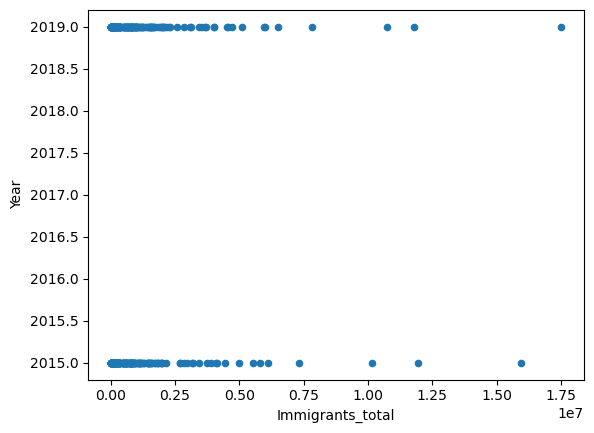

In [93]:
test.plot(kind='scatter',
            x= 'Immigrants_total',
            y= 'Year')

In [94]:
gp2.head(2)

country gp_rank_2015 gp_rank_2019
0  Luxembourg            —            —
1     Iceland            1            1

In [95]:
country_dep_df.head(2)

Year Country of departure  Total number of immigrants
0  2015          Afghanistan                   4977199.0
1  2015              Albania                   1129100.0

In [96]:
gp_test=country_dep_df.merge(gp2, left_on = ['Country of departure'], right_on = ['country'])
gp_test.head(2)

Year Country of departure  Total number of immigrants      country  \
0  2015          Afghanistan                   4977199.0  Afghanistan   
1  2019          Afghanistan                   5120959.0  Afghanistan   

  gp_rank_2015 gp_rank_2019  
0          160          163  
1          160          163

In [97]:
gp_test.corr()

Year  Total number of immigrants
Year                        1.000000                    0.026292
Total number of immigrants  0.026292                    1.000000

<AxesSubplot:xlabel='Total number of immigrants', ylabel='Year'>

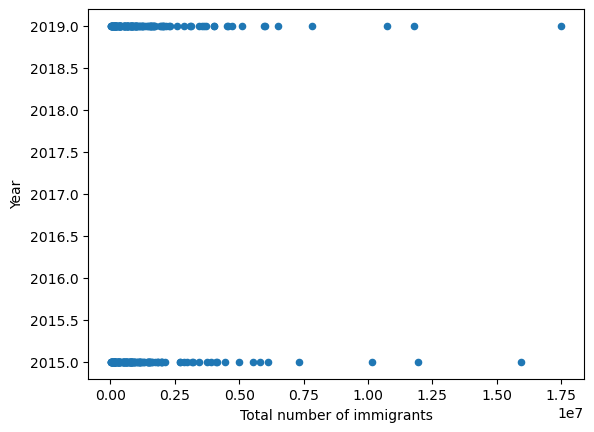

In [98]:
gp_test.plot(kind='scatter',
            x= 'Total number of immigrants',
            y= 'Year')

In [99]:
mk_glob=mass_killing_sra.merge(gp2, left_on = ['risk_in_2021_22country'], right_on = ['country'])

In [100]:
mk_glob.corr()

riskrank  1 in X chance  anymk.ongoing  \
riskrank                        1.000000       0.909971      -0.423147   
1 in X chance                   0.909971       1.000000      -0.276886   
anymk.ongoing                  -0.423147      -0.276886       1.000000   
anymk.ever                     -0.592880      -0.514126       0.361993   
imr.sqrt                       -0.668721      -0.615387       0.341747   
gdppcgrowth.combined           -0.115685      -0.016426       0.060968   
battledeaths.ln                -0.629333      -0.441349       0.569445   
religiousfreedom                0.447144       0.379369      -0.342591   
battledeaths                   -0.238703      -0.155772       0.364859   
percent_chance_of_mass_killing -0.726055      -0.505798       0.635017   
imr_per_1000                   -0.608920      -0.538143       0.355075   

                                anymk.ever  imr.sqrt  gdppcgrowth.combined  \
riskrank                         -0.592880 -0.668721             -0.115685   
1 in X chance                    -0.514126 -0.615387             -0.016426   
anymk.ongoing                     0.361993  0.341747              0.060968   
anymk.ever                        1.000000  0.308628              0.037516   
imr.sqrt                          0.308628  1.000000              0.246102   
gdppcgrowth.combined              0.037516  0.246102              1.000000   
battledeaths.ln                   0.372059  0.411433              0.066243   
religiousfreedom                 -0.212168 -0.160685             -0.075079   
battledeaths                      0.169128  0.161602              0.032405   
percent_chance_of_mass_killing    0.443831  0.489296              0.104164   
imr_per_1000                      0.282246  0.978165              0.245423   

                                battledeaths.ln  religiousfreedom  \
riskrank                              -0.629333          0.447144   
1 in X chance                         -0.441349          0.379369   
anymk.ongoing                          0.569445         -0.342591   
anymk.ever                             0.372059         -0.212168   
imr.sqrt                               0.411433         -0.160685   
gdppcgrowth.combined                   0.066243         -0.075079   
battledeaths.ln                        1.000000         -0.370286   
religiousfreedom                      -0.370286          1.000000   
battledeaths                           0.509283         -0.208055   
percent_chance_of_mass_killing         0.703238         -0.430478   
imr_per_1000                           0.407996         -0.117908   

                                battledeaths  percent_chance_of_mass_killing  \
riskrank                           -0.238703                       -0.726055   
1 in X chance                      -0.155772                       -0.505798   
anymk.ongoing                       0.364859                        0.635017   
anymk.ever                          0.169128                        0.443831   
imr.sqrt                            0.161602                        0.489296   
gdppcgrowth.combined                0.032405                        0.104164   
battledeaths.ln                     0.509283                        0.703238   
religiousfreedom                   -0.208055                       -0.430478   
battledeaths                        1.000000                        0.399250   
percent_chance_of_mass_killing      0.399250                        1.000000   
imr_per_1000                        0.152743                        0.483345   

                                imr_per_1000  
riskrank                           -0.608920  
1 in X chance                      -0.538143  
anymk.ongoing                       0.355075  
anymk.ever                          0.282246  
imr.sqrt                            0.978165  
gdppcgrowth.combined                0.245423  
battledeaths.ln                     0.407996  
religiousfreedom                   -0.11

<AxesSubplot:xlabel='battledeaths', ylabel='imr_per_1000'>

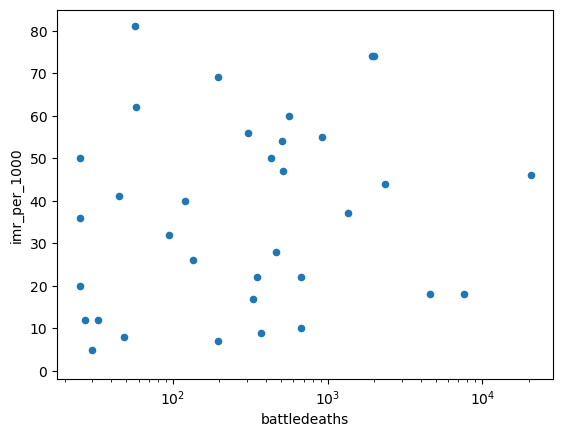

In [101]:
mk_glob.plot(kind='scatter',
            x= 'battledeaths',
            y= 'imr_per_1000', logx = True)

<AxesSubplot:xlabel='religiousfreedom', ylabel='riskrank'>

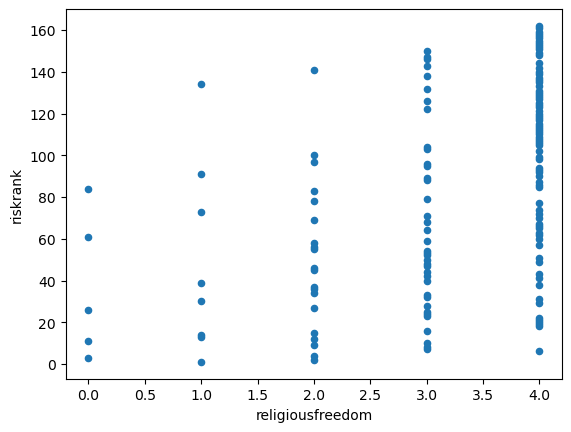

In [102]:
mk_glob.plot(kind='scatter',
            x= 'religiousfreedom',
            y= 'riskrank')

<AxesSubplot:xlabel='percent_chance_of_mass_killing', ylabel='riskrank'>

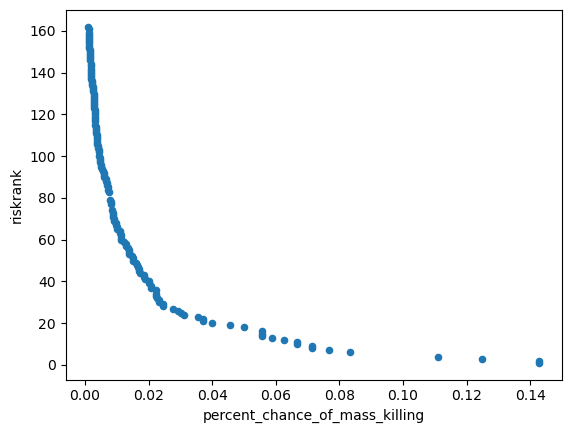

In [103]:
mk_glob.plot(kind='scatter',
            x= 'percent_chance_of_mass_killing',
            y= 'riskrank')

In [104]:
c_origin_unemp=unemp_rate.merge(country_by_dest, left_on = ['Entity', 'Year'], right_on = ['Country of departure', 'Year'])

In [105]:
c_origin_unemp

Entity Code  Year  \
0      Afghanistan  AFG  2015   
1      Afghanistan  AFG  2015   
2      Afghanistan  AFG  2015   
3      Afghanistan  AFG  2015   
4      Afghanistan  AFG  2015   
...            ...  ...   ...   
19161     Zimbabwe  ZWE  2019   
19162     Zimbabwe  ZWE  2019   
19163     Zimbabwe  ZWE  2019   
19164     Zimbabwe  ZWE  2019   
19165     Zimbabwe  ZWE  2019   

       Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                                  11.39                     
1                                                  11.39                     
2                                                  11.39                     
3                                                  11.39                     
4                                                  11.39                     
...                                                  ...                     
19161                                               5.02                     
19162                                               5.02                     
19163                                               5.02                     
19164                                               5.02                     
19165                                               5.02                     

      Major country, area of destination Country of departure  \
0                                Namibia          Afghanistan   
1                           South Africa          Afghanistan   
2                                 Guinea          Afghanistan   
3                                   Mali          Afghanistan   
4                                  Egypt          Afghanistan   
...                                  ...                  ...   
19161                             France             Zimbabwe   
19162                        Netherlands             Zimbabwe   
19163                        Switzerland             Zimbabwe   
19164                             Canada             Zimbabwe   
19165           United States of America             Zimbabwe   

       Total number of immigrants  
0                            42.0  
1                           145.0  
2                             3.0  
3                           480.0  
4                           146.0  
...                           ...  
19161                       771.0  
19162                      1537.0  
19163                      1032.0  
19164                     11176.0  
19165                     59895.0  

[19166 rows x 7 columns]

In [106]:
#syntax to drop rows of a column based on criteria------df.drop(df[df['column_name']=='value'].index)

In [107]:
c_origin_unemp.corr()

Year  \
Year                                                1.000000   
Unemployment, total (% of total labor force) (m... -0.097192   
Total number of immigrants                          0.005079   

                                                    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
Year                                                                                        -0.097192                     
Unemployment, total (% of total labor force) (m...                                           1.000000                     
Total number of immigrants                                                                  -0.014575                     

                                                    Total number of immigrants  
Year                                                                  0.005079  
Unemployment, total (% of total labor force) (m...                   -0.014575  
Total number of immigrants                                            1.000000

<AxesSubplot:xlabel='Total number of immigrants', ylabel='Unemployment, total (% of total labor force) (modeled ILO estimate)'>

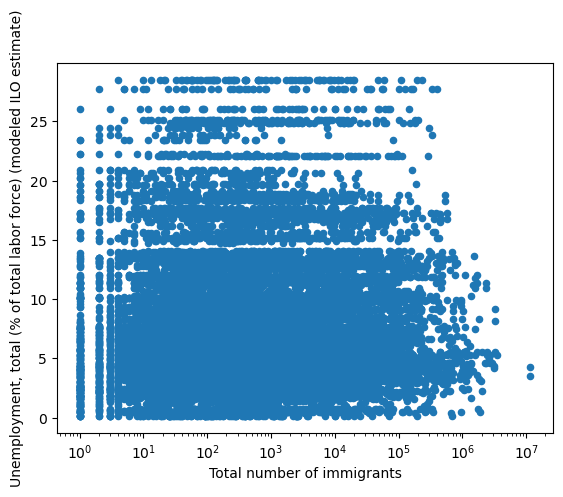

In [108]:
c_origin_unemp.plot(kind='scatter',
            x= 'Total number of immigrants',
            y= 'Unemployment, total (% of total labor force) (modeled ILO estimate)', logx= True)

In [109]:
I=img_stk_2yrs.merge(country_dep_df, left_on = ['Major country, area of destination'], right_on = ['Country of departure'])

In [110]:
I.corr()

Sort order  M/F img_stk 2015  M/F img_stk 2019  \
Sort order                  1.000000e+00      1.587899e-01      1.589647e-01   
M/F img_stk 2015            1.587899e-01      1.000000e+00      9.977832e-01   
M/F img_stk 2019            1.589647e-01      9.977832e-01      1.000000e+00   
M img_stk 2015              1.378905e-01      9.934682e-01      9.940405e-01   
M img_stk 2019              1.378632e-01      9.867278e-01      9.925588e-01   
F img_stk 2015              1.775696e-01      9.935016e-01      9.885317e-01   
F img_stk 2019              1.777594e-01      9.939513e-01      9.925086e-01   
Year                       -1.162380e-16      1.066610e-16      3.328773e-17   
Total number of immigrants -2.685349e-03      2.502183e-01      2.464403e-01   

                            M img_stk 2015  M img_stk 2019  F img_stk 2015  \
Sort order                    1.378905e-01    1.378632e-01    1.775696e-01   
M/F img_stk 2015              9.934682e-01    9.867278e-01    9.935016e-01   
M/F img_stk 2019              9.940405e-01    9.925588e-01    9.885317e-01   
M img_stk 2015                1.000000e+00    9.968044e-01    9.740246e-01   
M img_stk 2019                9.968044e-01    1.000000e+00    9.638361e-01   
F img_stk 2015                9.740246e-01    9.638361e-01    1.000000e+00   
F img_stk 2019                9.763989e-01    9.702465e-01    9.985241e-01   
Year                         -5.747158e-17   -1.525508e-16    2.557585e-16   
Total number of immigrants    2.407116e-01    2.366475e-01    2.564446e-01   

                            F img_stk 2019          Year  \
Sort order                    1.777594e-01 -1.162380e-16   
M/F img_stk 2015              9.939513e-01  1.066610e-16   
M/F img_stk 2019              9.925086e-01  3.328773e-17   
M img_stk 2015                9.763989e-01 -5.747158e-17   
M img_stk 2019                9.702465e-01 -1.525508e-16   
F img_stk 2015                9.985241e-01  2.557585e-16   
F img_stk 2019                1.000000e+00  2.275256e-16   
Year                          2.275256e-16  1.000000e+00   
Total number of immigrants    2.525798e-01  2.396385e-02   

                            Total number of immigrants  
Sort order                                   -0.002685  
M/F img_stk 2015                              0.250218  
M/F img_stk 2019                              0.246440  
M img_stk 2015                                0.240712  
M img_stk 2019                                0.236648  
F img_stk 2015                                0.256445  
F img_stk 2019                                0.252580  
Year                                          0.023964  
Total number of immigrants                    1.000000

In [111]:
img_stk_2yrs

Sort order Major country, area of destination  M/F img_stk 2015  \
0            24                            Burundi          289810.0   
1            25                            Comoros           12555.0   
2            26                           Djibouti          112351.0   
3            27                            Eritrea           15941.0   
4            28                           Ethiopia         1161642.0   
..          ...                                ...               ...   
255         279                            Bermuda           19126.0   
256         280                             Canada         7428657.0   
257         281                          Greenland            5797.0   
258         282          Saint Pierre and Miquelon             986.0   
259         283           United States of America        48178877.0   

     M/F img_stk 2019  M img_stk 2015  M img_stk 2019  F img_stk 2015  \
0            321018.0          142790        158163.0        147020.0   
1             12504.0            6071          6047.0          6484.0   
2            115341.0           59081         60654.0         53270.0   
3             16101.0            8833          8922.0          7108.0   
4           1253083.0          591409        637963.0        570233.0   
..                ...             ...             ...             ...   
255           19336.0            9336          9439.0          9790.0   
256         7960657.0         3533164       3786190.0       3895493.0   
257            5690.0            3812          3742.0          1985.0   
258             990.0             516           519.0           470.0   
259        50661149.0        23446873      24488382.0      24732004.0   

     F img_stk 2019  
0            162855  
1              6457  
2             54687  
3              7179  
4            615120  
..              ...  
255            9897  
256         4174467  
257            1948  
258             471  
259        26172767  

[232 rows x 8 columns]

C:\Users\ksobi\AppData\Local\Temp\TableauTemp\1661843747\Data\created CSVs

In [112]:
country_by_dest

Year Major country, area of destination Country of departure  \
8       2015                          Mauritius             Malaysia   
33      2015                       South Africa             Malaysia   
40      2015                             Guinea             Malaysia   
51      2015                            Algeria             Malaysia   
52      2015                              Egypt             Malaysia   
...      ...                                ...                  ...   
107639  2019                         Luxembourg   Russian Federation   
107641  2019                        Netherlands   Russian Federation   
107642  2019                        Switzerland   Russian Federation   
107644  2019                             Canada   Russian Federation   
107647  2019           United States of America   Russian Federation   

        Total number of immigrants  
8                             61.0  
33                          1419.0  
40                             1.0  
51                           838.0  
52                          1965.0  
...                            ...  
107639                      2575.0  
107641                     64997.0  
107642                     24539.0  
107644                     83802.0  
107647                    411537.0  

[23064 rows x 4 columns]

In [113]:
country_by_dest=country_by_dest.rename(columns = {'Major country, area of destination': 'Country of destination'})
country_by_dest

Year    Country of destination Country of departure  \
8       2015                 Mauritius             Malaysia   
33      2015              South Africa             Malaysia   
40      2015                    Guinea             Malaysia   
51      2015                   Algeria             Malaysia   
52      2015                     Egypt             Malaysia   
...      ...                       ...                  ...   
107639  2019                Luxembourg   Russian Federation   
107641  2019               Netherlands   Russian Federation   
107642  2019               Switzerland   Russian Federation   
107644  2019                    Canada   Russian Federation   
107647  2019  United States of America   Russian Federation   

        Total number of immigrants  
8                             61.0  
33                          1419.0  
40                             1.0  
51                           838.0  
52                          1965.0  
...                            ...  
107639                      2575.0  
107641                     64997.0  
107642                     24539.0  
107644                     83802.0  
107647                    411537.0  

[23064 rows x 4 columns]

In [114]:
newlist=country_by_dest['Country of departure'].tolist()

In [116]:
#country_by_dest.T

In [117]:
#country_by_dest.melt(['Year','Major country, area of destination', 'Country of departure'])

In [118]:
country_pop.head()

Sort order   Country  M/F pop 2015  M/F pop 2019  M pop 2015  M pop 2019  \
0          24   Burundi    10160030.0    11530580.0   5030735.0   5718988.0   
1          25   Comoros      777424.0      850886.0    392089.0    429210.0   
2          26  Djibouti      913993.0      973560.0    483117.0    511947.0   
3          27   Eritrea     3342818.0     3497117.0   1674330.0   1752711.0   
4          28  Ethiopia   100835458.0   112078730.0  50408589.0  56069008.0   

   F pop 2015  F pop 2019  
0   5129299.0   5811589.0  
1    385346.0    421681.0  
2    430881.0    461610.0  
3   1668488.0   1744406.0  
4  50426864.0  56009719.0

In [119]:
country_pop=country_pop.drop(columns=['M pop 2015','M pop 2019', 'F pop 2015', 'F pop 2019'])

In [129]:
merged_pop_dest=pd.merge(country_by_dest,country_pop, how='left', left_on=['Country of destination'], right_on=['Country'])
merged_pop_dest

Year    Country of destination Country of departure  \
0      2015                 Mauritius             Malaysia   
1      2015              South Africa             Malaysia   
2      2015                    Guinea             Malaysia   
3      2015                   Algeria             Malaysia   
4      2015                     Egypt             Malaysia   
...     ...                       ...                  ...   
23059  2019                Luxembourg   Russian Federation   
23060  2019               Netherlands   Russian Federation   
23061  2019               Switzerland   Russian Federation   
23062  2019                    Canada   Russian Federation   
23063  2019  United States of America   Russian Federation   

       Total number of immigrants  Sort order                   Country  \
0                            61.0          32                 Mauritius   
1                          1419.0          59              South Africa   
2                             1.0          67                    Guinea   
3                           838.0          80                   Algeria   
4                          1965.0          81                     Egypt   
...                           ...         ...                       ...   
23059                      2575.0         274                Luxembourg   
23060                     64997.0         276               Netherlands   
23061                     24539.0         277               Switzerland   
23062                     83802.0         280                    Canada   
23063                    411537.0         283  United States of America   

       M/F pop 2015  M/F pop 2019  
0         1259456.0     1269668.0  
1        55386367.0    58558270.0  
2        11432088.0    12771246.0  
3        39728025.0    43053054.0  
4        92442547.0   100388073.0  
...             ...           ...  
23059      566741.0      615729.0  
23060    16938499.0    17097130.0  
23061     8296775.0     8591365.0  
23062    36026676.0    37411047.0  
23063   320878310.0   329064917.0  

[23064 rows x 8 columns]

In [130]:
merged_pop_dest['country_of_dep']=newlist
merged_pop_dest

Year    Country of destination Country of departure  \
0      2015                 Mauritius             Malaysia   
1      2015              South Africa             Malaysia   
2      2015                    Guinea             Malaysia   
3      2015                   Algeria             Malaysia   
4      2015                     Egypt             Malaysia   
...     ...                       ...                  ...   
23059  2019                Luxembourg   Russian Federation   
23060  2019               Netherlands   Russian Federation   
23061  2019               Switzerland   Russian Federation   
23062  2019                    Canada   Russian Federation   
23063  2019  United States of America   Russian Federation   

       Total number of immigrants  Sort order                   Country  \
0                            61.0          32                 Mauritius   
1                          1419.0          59              South Africa   
2                             1.0          67                    Guinea   
3                           838.0          80                   Algeria   
4                          1965.0          81                     Egypt   
...                           ...         ...                       ...   
23059                      2575.0         274                Luxembourg   
23060                     64997.0         276               Netherlands   
23061                     24539.0         277               Switzerland   
23062                     83802.0         280                    Canada   
23063                    411537.0         283  United States of America   

       M/F pop 2015  M/F pop 2019      country_of_dep  
0         1259456.0     1269668.0            Malaysia  
1        55386367.0    58558270.0            Malaysia  
2        11432088.0    12771246.0            Malaysia  
3        39728025.0    43053054.0            Malaysia  
4        92442547.0   100388073.0            Malaysia  
...             ...           ...                 ...  
23059      566741.0      615729.0  Russian Federation  
23060    16938499.0    17097130.0  Russian Federation  
23061     8296775.0     8591365.0  Russian Federation  
23062    36026676.0    37411047.0  Russian Federation  
23063   320878310.0   329064917.0  Russian Federation  

[23064 rows x 9 columns]

In [131]:
merged_pop_dest['2019_immigrants_per_100k']=(merged_pop_dest['Total number of immigrants']/merged_pop_dest['M/F pop 2019'])*100000
merged_pop_dest.head(30)

Year           Country of destination Country of departure  \
0   2015                        Mauritius             Malaysia   
1   2015                     South Africa             Malaysia   
2   2015                           Guinea             Malaysia   
3   2015                          Algeria             Malaysia   
4   2015                            Egypt             Malaysia   
5   2015                            Libya             Malaysia   
6   2015                           Cyprus             Malaysia   
7   2015                           Jordan             Malaysia   
8   2015                           Turkey             Malaysia   
9   2015                       Bangladesh             Malaysia   
10  2015                            India             Malaysia   
11  2015                         Maldives             Malaysia   
12  2015                        Sri Lanka             Malaysia   
13  2015                            China             Malaysia   
14  2015             China, Hong Kong SAR             Malaysia   
15  2015  Dem. People's Republic of Korea             Malaysia   
16  2015                            Japan             Malaysia   
17  2015                Republic of Korea             Malaysia   
18  2015                Brunei Darussalam             Malaysia   
19  2015                         Cambodia             Malaysia   
20  2015                        Indonesia             Malaysia   
21  2015                      Philippines             Malaysia   
22  2015                        Singapore             Malaysia   
23  2015                         Thailand             Malaysia   
24  2015                      Timor-Leste             Malaysia   
25  2015                         Viet Nam             Malaysia   
26  2015                   Cayman Islands             Malaysia   
27  2015               Dominican Republic             Malaysia   
28  2015                      Saint Lucia             Malaysia   
29  2015                       Costa Rica             Malaysia   

    Total number of immigrants  Sort order                          Country  \
0                         61.0          32                        Mauritius   
1                       1419.0          59                     South Africa   
2                          1.0          67                           Guinea   
3                        838.0          80                          Algeria   
4                       1965.0          81                            Egypt   
5                       7921.0          82                            Libya   
6                         47.0          91                           Cyprus   
7                        274.0          95                           Jordan   
8                        264.0         103                           Turkey   
9                     203561.0         115                       Bangladesh   
10                     12433.0         117                            India   
11                       101.0         119                         Maldives   
12                       918.0         122                        Sri Lanka   
13                      6130.0         125                            China   
14                     15273.0         126             China, Hong Kong SAR   
15                       196.0         128  Dem. People's Republic of Korea   
16                      8738.0         129                            Japan   
17                      1376.0         131                Republic of Korea   
18                     48285.0         133                Brunei Darussalam   
19                       172.0         134                         Cambodia   
20                      2263.0         135                        Indonesia   
21                       793.0         139                      Philippines   
22                   1123654.0         140                        Singapore   
23                      1314.0         141                   

In [123]:
pop_2019=country_pop[['Country', 'M/F pop 2019']]

In [124]:
pop_2019

Country  M/F pop 2019
0                      Burundi    11530580.0
1                      Comoros      850886.0
2                     Djibouti      973560.0
3                      Eritrea     3497117.0
4                     Ethiopia   112078730.0
..                         ...           ...
255                    Bermuda       62506.0
256                     Canada    37411047.0
257                  Greenland       56672.0
258  Saint Pierre and Miquelon        5822.0
259   United States of America   329064917.0

[232 rows x 2 columns]

In [125]:
country_dep_df=country_dep_df.rename(columns={'Country of departure': 'Country'})

In [126]:
country_pop

Sort order                    Country  M/F pop 2015  M/F pop 2019
0            24                    Burundi    10160030.0    11530580.0
1            25                    Comoros      777424.0      850886.0
2            26                   Djibouti      913993.0      973560.0
3            27                    Eritrea     3342818.0     3497117.0
4            28                   Ethiopia   100835458.0   112078730.0
..          ...                        ...           ...           ...
255         279                    Bermuda       63692.0       62506.0
256         280                     Canada    36026676.0    37411047.0
257         281                  Greenland       56377.0       56672.0
258         282  Saint Pierre and Miquelon        5993.0        5822.0
259         283   United States of America   320878310.0   329064917.0

[232 rows x 4 columns]

In [127]:
yr_19=country_pop.loc[country_pop['M/F pop 2019']]
yr_19

KeyError: "None of [Float64Index([ 11530580.0,    850886.0,    973560.0,   3497117.0, 112078730.0,\n               52573973.0,  26969307.0,  18628747.0,   1269668.0,    266150.0,\n              ...\n                  38019.0,    615729.0,     38964.0,  17097130.0,   8591365.0,\n                  62506.0,  37411047.0,     56672.0,      5822.0, 329064917.0],\n             dtype='float64', length=232)] are in the [index]"

In [ ]:
country_dep_df

In [ ]:
country_pop_merge=pd.merge(country_dep_df, pop_2019)

In [ ]:
country_pop_merge.loc

In [ ]:
merged_pop_dest.to_csv('../Data/merged_pop_dest.csv')

In [ ]:
merged_pop_dest['Country of departure'].value_counts()

In [ ]:
yr_19=country_pop_merge.loc[country_pop_merge['Year'] == 2019]

In [ ]:
yr_19

In [ ]:
yr_19['Immigrants per 100000']=(yr_19['M/F pop 2019'])/ yr_19['Total number of immigrants']
yr_19